# Differential gene expression analysis of germinating _M. polymorpha_ wild type and _gun1_ mutant spores grown in the presence or absence of spectinomycin

### Methods

_M. polymorpha_ spores were sterilised and plated on ½ Gamborg’s medium (Duchefa Biochemie) supplemented with 1.2 % agar and 500 μg⋅ml-1 spectinomycin (an inhibitor of plastid translation). The spores were germinated under long day conditions for 48 hours, after which they were resuspended in 1 ml of sterile water, transferred into a microcentrifuge tube and spun down at 6,000 rpm for 1 minute. The water was removed, and the spore pellet flash-frozen in liquid nitrogen. 

Extraction of total RNA from _Marchantia_ spores was carried out using the Direct-Zol RNA MINIprep kit (Zymo Research) following the manufacturer’s protocol. Three independent biological replicates were extracted for each line. RNA was quantified using a NanoDrop spectrophotometer (Thermo Fisher) and diluted to 250 ng⋅μl-1 before DNase treatment using Turbo DNase (Ambion) as recommended by the manufacturer. 

Transcriptome libraries of _M. polymorpha_ wild-type and _Mpgun1_ mutant spores were prepared using 200 ng of DNase-treated total RNA as a template for the TruSeq Stranded Total RNA kit with Ribo-Zero Plant (Illumina). The libraries were sequenced on an Illumina HiSeq 4000 platform (150 nt paired-end reads) at Novogene, Hong Kong. At least 5.7 GB raw data was obtained for each replicate library. Sequencing read data was deposited at the Short Read Archive database at the National Center for Biotechnology Information (NCBI) under project number PRJNA800059.

Optical duplicate reads were first removed with clumpify (parameters: dedupe optical dist = 40) from the bbmap package (https://sourceforge.net/projects/bbmap/) and adapters were trimmed with bbduk (parameters: ktrim=r k=23 mink=11 hdist=1 tpe tbo ftm=5). The reads were then assigned to transcripts using Salmon v1.3.0 (Patro et al., 2017) (parameters: -l A --validateMappings) against an index prepared with the _M. polymorpha_ MpTak_v6.1 reference genome and cDNA assemblies (https://marchantia.info/). Differential expression analyses were carried out using DESeq2 (Love et al., 2014). Functional annotations for MpTak_v5.1 genome release were used to identify _M. polymorpha_ photosynthesis-associated nuclear genes. 


References:
    
Patro R, Duggal G, Love MI, Irizarry RA, Kingsford C. 2017. Salmon provides fast and bias-aware quantification of transcript expression. Nature methods 14: 417–419.

Love MI, Huber W, Anders S. 2014. Moderated estimation of fold change and dispersion for RNA-seq data with DESeq2. Genome biology 15: 550.

In [63]:
pwd

'/Users/suvihonkanen/Desktop/GUN1 manuscript/Dryad'

In [44]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
## read in the metadata as sample_table
sample_table = pd.read_csv("mp_sample_table2.txt", sep="\t")
sample_table.set_index('sample', inplace=True)
sample_table.head(12)

treatment genotype    geno_treat
sample                                 
M1       control       wt    control_wt
M2       control       wt    control_wt
M3       control       wt    control_wt
M4          spec       wt      spec_wt1
M5          spec       wt      spec_wt2
M6          spec       wt      spec_wt3
M7       control     gun1  control_gun1
M8       control     gun1  control_gun2
M9       control     gun1  control_gun3
M10         spec     gun1     spec_gun1
M11         spec     gun1     spec_gun2
M12         spec     gun1     spec_gun3

In [46]:
#read in the sequencing read counts table 
Mpdata = pd.read_csv('Mpdata_spec.csv')

#use the gene IDs as the row indexes
Mpdata.set_index('gene_ID',inplace=True)
Mpdata.head(10)

M1      M2     M3      M4      M5      M6     M7     M8     M9  \
gene_ID                                                                        
Mp1g00010  21079  150646  33836    3279    6389    5786   8263  16653  64172   
Mp1g00020      0       0      0       0       0       0      0      0      0   
Mp1g00030      0       0      0       0       0       0      0      0      0   
Mp1g00040      0       0      0       0       0       0      0      0      0   
Mp1g00050     18      83     15      17      23      16     17      3     43   
Mp1g00060  18021    8054  16909  373414  297826  147223  19345  11563   3400   
Mp1g00070   1081     515   1257      62      39      29   1710    596    411   
Mp1g00080  12538    5827  10946    6326    5012    4779  11002   3730   2583   
Mp1g00090    124      95    107     149     142     161    122    123     42   
Mp1g00100    345     180    371     284     196     176    295    657     81   

             M10     M11     M12  
gene_ID                           
Mp1g00010  12498   36078    2808  
Mp1g00020      0       0       0  
Mp1g00030      0       0       0  
Mp1g00040      0       0       0  
Mp1g00050     12      24      26  
Mp1g00060  59159  143019  174330  
Mp1g00070     22      31      42  
Mp1g00080   1055    2720    3813  
Mp1g00090    166     138     212  
Mp1g00100    614     439     299

In [6]:
print(len(Mpdata))

19320


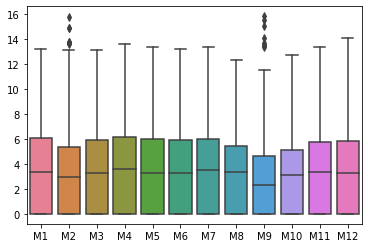

In [7]:
#plot the distribution of counts in each sample - plotting log(counts+1) makes it easier
#the +1 is to avoid dividing by zero

fig, ax = plt.subplots(1,1, figsize=(6,4))
#boxplots show the median (horizontal line), the interquartile range (coloured box),
#and 'whiskers' which by default extend 1.5x the IQR in each direction
sns.boxplot(data=np.log(Mpdata+1),palette='husl',ax=ax)
ax.set_xticklabels(ax.get_xticklabels());

In [8]:
#prefilter data to retain all transcripts with at least 10 counts in at least one sample
prefiltered_Mpdata = Mpdata[Mpdata.max(axis=1) > 10]

#check the number of transcripts included before and after filtering
print(len(Mpdata))
print(len(prefiltered_Mpdata))

prefiltered_Mpdata.head(10)

19320
12296


M1      M2     M3      M4      M5      M6     M7     M8     M9  \
gene_ID                                                                        
Mp1g00010  21079  150646  33836    3279    6389    5786   8263  16653  64172   
Mp1g00050     18      83     15      17      23      16     17      3     43   
Mp1g00060  18021    8054  16909  373414  297826  147223  19345  11563   3400   
Mp1g00070   1081     515   1257      62      39      29   1710    596    411   
Mp1g00080  12538    5827  10946    6326    5012    4779  11002   3730   2583   
Mp1g00090    124      95    107     149     142     161    122    123     42   
Mp1g00100    345     180    371     284     196     176    295    657     81   
Mp1g00110    286     102    173     251     196     157    240    125     47   
Mp1g00120    575     302    547     542     387     407    693    294    162   
Mp1g00140    844     460    848     751     623     453    658    773    216   

             M10     M11     M12  
gene_ID                           
Mp1g00010  12498   36078    2808  
Mp1g00050     12      24      26  
Mp1g00060  59159  143019  174330  
Mp1g00070     22      31      42  
Mp1g00080   1055    2720    3813  
Mp1g00090    166     138     212  
Mp1g00100    614     439     299  
Mp1g00110     92     189     197  
Mp1g00120    148     339     439  
Mp1g00140    511     651     544

In [9]:
#run DEseq2 differential gene expression analysis

from diffexpr.py_deseq import py_DESeq2

dds = py_DESeq2(count_matrix = prefiltered_Mpdata.reset_index(),
               design_matrix = sample_table,
               design_formula = '~ geno_treat', #telling DESeq2 which factors to take into account
               gene_column = 'gene_ID') #telling DESeq2 this should be the gene ID column
  
dds.run_deseq()  

In [10]:
normalized_Mpdata = dds.normalized_count().set_index('gene_ID')
normalized_Mpdata.head()


INFO:DESeq2:Normalizing counts


M1             M2            M3             M4  \
gene_ID                                                               
Mp1g00010  14214.908964  202562.656501  26258.733870    1991.800567   
Mp1g00050     12.138544     111.604029     11.640886      10.326505   
Mp1g00060  12152.705273   10829.624653  13122.382404  226827.147610   
Mp1g00070    728.986982     692.482828    975.506220      37.661371   
Mp1g00080   8455.170008    7835.140657   8494.742314    3842.674714   

                      M5             M6            M7            M8  \
gene_ID                                                               
Mp1g00010    4789.146399    4812.398211   5764.525806  20373.117691   
Mp1g00050      17.240627      13.307703     11.859729      3.670171   
Mp1g00060  223248.132033  122450.000318  13495.673693  14146.061362   
Mp1g00070      29.234107      24.120212   1192.949187    729.140584   
Mp1g00080    3756.957545    3974.844634   7675.337398   4563.245601   

                      M9            M10            M11            M12  
gene_ID                                                                
Mp1g00010  184405.860733   21285.250979   34469.883880    2498.745008  
Mp1g00050     123.565605      20.437111      22.930240      23.136528  
Mp1g00060    9770.303660  100753.253536  136644.168819  155130.419221  
Mp1g00070    1181.057295      37.468037      29.618227      37.374391  
Mp1g00080    7422.557163    1796.762665    2598.760579    3393.060796

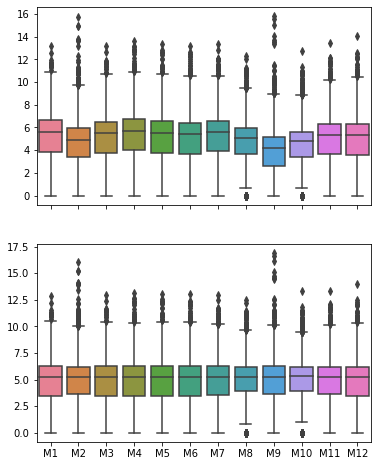

In [11]:
#compare the counts before and after normalization
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(6,8), sharex=True)
sns.boxplot(data=np.log(prefiltered_Mpdata+1),palette='husl',ax=ax1)
sns.boxplot(data=np.log(normalized_Mpdata+1),palette='husl',ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels());

In [12]:
logncounts = np.log(normalized_Mpdata+1)
logncounts.head(10)

M1         M2         M3         M4         M5         M6  \
gene_ID                                                                      
Mp1g00010  9.562117  12.218809  10.175792   7.597296   8.474316   8.479159   
Mp1g00050  2.575550   4.723877   2.536936   2.427146   2.903651   2.660798   
Mp1g00060  9.405389   9.290133   9.482151  12.331948  12.316044  11.715466   
Mp1g00070  6.593027   6.541726   6.883981   3.654841   3.408971   3.223673   
Mp1g00080  9.042652   8.966502   9.047320   8.254184   8.231631   8.287992   
Mp1g00090  4.438183   4.857791   4.431273   4.516435   4.676952   4.904599   
Mp1g00100  5.453847   5.493197   5.666143   5.156255   4.996672   4.993046   
Mp1g00110  5.267177   4.928354   4.907186   5.033491   4.996672   4.879629   
Mp1g00120  5.962960   6.009003   6.053275   5.799799   5.673640   5.827517   
Mp1g00140  6.345922   6.428958   6.490872   6.125096   6.148460   5.934297   

                 M7        M8         M9        M10        M11        M12  
gene_ID                                                                    
Mp1g00010  8.659652  9.922021  12.124900   9.965817  10.447870   7.823944  
Mp1g00050  2.554101  1.541196   4.824833   3.065124   3.175143   3.183726  
Mp1g00060  9.510199  9.557262   9.187205  11.520440  11.825143  11.952028  
Mp1g00070  7.085022  6.593237   7.075012   3.649828   3.421595   3.647390  
Mp1g00080  8.945898  8.426009   8.912414   7.494298   7.863175   8.129782  
Mp1g00090  4.455637  5.020434   4.801493   5.647964   4.889212   5.245189  
Mp1g00100  5.331758  6.690553   5.454308   6.953397   6.041284   5.587511  
Mp1g00110  5.126529  5.036458   4.913097   5.060596   5.201672   5.172208  
Mp1g00120  6.183031  5.887982   6.145314   5.533618   5.783486   5.970372  
Mp1g00140  6.131316  6.852962   6.432460   6.769964   6.434519   6.184329

## Read in functional annotations for _M. polymorpha_ genes and create a list of _M. polymorpha_ genes similar to _Arabidopsis_ genes regulated by chloroplast retrograde signalling


In [15]:
#read in functional annotations
func_anno = pd.read_csv("MpTak1_v5.1r2_func_annotation_1line.csv")
func_anno

Mp1g00070  \
0      Mp1g00080   
1      Mp1g00090   
2      Mp1g00100   
3      Mp1g00110   
4      Mp1g00120   
...          ...   
18283  Mpzg01390   
18284  Mpzg01400   
18285  Mpzg01410   
18286  Mpzg01440   
18287  Mpzg01450   

      KEGG:K10683:BARD1, BRCA1-associated RING domain protein 1; KOG:KOG4362:Transcriptional regulator BRCA1, [LK]; KOG:KOG0311:Predicted E3 ubiquitin ligase, C-term missing, [O]; CDD:cd16449:RING-HC; CDD:cd15571:ePHD; Pfam:PF00533:BRCA1 C Terminus (BRCT) domain; MobiDBLite:consensus disorder prediction; SUPERFAMILY:SSF52113:BRCT domain; ProSiteProfiles:PS50089:Zinc finger RING-type profile.; G3DSA:3.40.50.10190; PANTHER:PTHR13763:BREAST CANCER TYPE 1 SUSCEPTIBILITY PROTEIN BRCA1; G3DSA:3.30.40.10:Zinc/RING finger domain; Pfam:PF13771:PHD-like zinc-binding domain; ProSiteProfiles:PS50172:BRCT domain profile.; Pfam:PF13923:Zinc finger, C3HC4 type (RING finger); SUPERFAMILY:SSF57850:RING/U-box; CDD:cd17734:BRCT_Bard1_rpt1; ProSitePatterns:PS00518:Zinc finger RING-type signature.; SMART:SM00249:PHD_3; SMART:SM00292:BRCT_7; SMART:SM00184:ring_2; ProSiteProfiles:PS51805:Extended PHD (ePHD) domain profile.; GO:0006281:DNA repair; GO:0006974:cellular response to DNA damage stimulus; MapolyID:Mapoly0103s0079  
0      KEGG:K01599:hemE, UROD, uroporphyrinogen decar...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
1      KOG:KOG2896:UV radiation resistance associated...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
2      G3DSA:3.40.50.11350; PANTHER:PTHR31741:OS02G07...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [16]:
func_anno.columns =['gene_ID', 'annotation']
func_anno.set_index("gene_ID", inplace=True)
func_anno

annotation
gene_ID                                                     
Mp1g00080  KEGG:K01599:hemE, UROD, uroporphyrinogen decar...
Mp1g00090  KOG:KOG2896:UV radiation resistance associated...
Mp1g00100  G3DSA:3.40.50.11350; PANTHER:PTHR31741:OS02G07...
Mp1g00110  KOG:KOG2858:Uncharacterized conserved protein,...
Mp1g00120  KEGG:K00942:E2.7.4.8, gmk, guanylate kinase [E...
...                                                      ...
Mpzg01390                           MapolyID:Mapoly0314s0001
Mpzg01400                           MapolyID:Mapoly0314s0002
Mpzg01410  MobiDBLite:consensus disorder prediction; Pfam...
Mpzg01440  KEGG:K01052:LIPA, lysosomal acid lipase/choles...
Mpzg01450  PTHR31301:SF68:LOB DOMAIN-CONTAINING PROTEIN 3...

[18288 rows x 1 columns]

In [17]:
#extract LHCB1 genes
LHCB1_genes = func_anno[func_anno['annotation'].str.contains('LHCB1', na=False)]
print (LHCB1_genes)

                                                  annotation
gene_ID                                                     
Mp5g15460  KEGG:K08912:LHCB1, light-harvesting complex II...
Mp7g05890  KEGG:K08912:LHCB1, light-harvesting complex II...
Mp7g06740  KEGG:K08912:LHCB1, light-harvesting complex II...
Mp7g09340  KEGG:K08912:LHCB1, light-harvesting complex II...


In [18]:
#extract LHCB2 genes
LHCB2_genes = func_anno[func_anno['annotation'].str.contains('LHCB2', na=False)]
print (LHCB2_genes)

                                                  annotation
gene_ID                                                     
Mp1g29620  KEGG:K08913:LHCB2, light-harvesting complex II...
Mp2g13460  KEGG:K08913:LHCB2, light-harvesting complex II...
Mp7g05880  KEGG:K08913:LHCB2, light-harvesting complex II...
Mp7g05980  KEGG:K08913:LHCB2, light-harvesting complex II...
Mp7g06710  KEGG:K08913:LHCB2, light-harvesting complex II...
Mp7g06720  KEGG:K08913:LHCB2, light-harvesting complex II...
Mp7g06730  KEGG:K08913:LHCB2, light-harvesting complex II...
Mp7g06750  KEGG:K08913:LHCB2, light-harvesting complex II...
Mp7g06760  KEGG:K08913:LHCB2, light-harvesting complex II...
Mp7g06770  KEGG:K08913:LHCB2, light-harvesting complex II...
Mp7g06780  KEGG:K08913:LHCB2, light-harvesting complex II...
Mp7g06790  KEGG:K08913:LHCB2, light-harvesting complex II...
Mp7g09180  KEGG:K08913:LHCB2, light-harvesting complex II...


In [19]:
#extract RBCS genes
RBCS_genes =  func_anno[func_anno['annotation'].str.contains('rbcS', na=False)]
print (RBCS_genes)

                                                  annotation
gene_ID                                                     
Mp4g05960  KEGG:K01602:rbcS, cbbS, ribulose-bisphosphate ...
Mp4g05970  KEGG:K01602:rbcS, cbbS, ribulose-bisphosphate ...
Mp4g05980  KEGG:K01602:rbcS, cbbS, ribulose-bisphosphate ...
Mp4g05990  KEGG:K01602:rbcS, cbbS, ribulose-bisphosphate ...
Mp4g06000  KEGG:K01602:rbcS, cbbS, ribulose-bisphosphate ...
Mp4g06010  KEGG:K01602:rbcS, cbbS, ribulose-bisphosphate ...
Mp4g06020  KEGG:K01602:rbcS, cbbS, ribulose-bisphosphate ...
Mp4g06030  KEGG:K01602:rbcS, cbbS, ribulose-bisphosphate ...
Mp4g06040  KEGG:K01602:rbcS, cbbS, ribulose-bisphosphate ...
Mp4g06050  KEGG:K01602:rbcS, cbbS, ribulose-bisphosphate ...
Mp4g09890  KEGG:K01602:rbcS, cbbS, ribulose-bisphosphate ...
Mp4g10830  KEGG:K01602:rbcS, cbbS, ribulose-bisphosphate ...
Mp4g10850  KEGG:K01602:rbcS, cbbS, ribulose-bisphosphate ...
Mp4g14420  KEGG:K01602:rbcS, cbbS, ribulose-bisphosphate ...
Mp4g15070  KEGG:K01602:r

In [20]:
#extract beta carbonic anhydrase genes
CA_genes = func_anno[func_anno['annotation'].str.contains('beta-carbonic anhydrase', na=False)]
print (CA_genes)

                                                  annotation
gene_ID                                                     
Mp3g08980  KEGG:K01673:cynT, can, carbonic anhydrase [EC:...
Mp6g07320  KEGG:K01673:cynT, can, carbonic anhydrase [EC:...
Mp8g15740  KEGG:K01673:cynT, can, carbonic anhydrase [EC:...


In [21]:
#extract CP12 genes
CP12 = func_anno[func_anno['annotation'].str.contains('CP12', na=False)]
print (CP12)

                                                  annotation
gene_ID                                                     
Mp2g10550  PANTHER:PTHR33921:CALVIN CYCLE PROTEIN CP12-2,...
Mp2g19370  KEGG:K05298:GAPA, glyceraldehyde-3-phosphate d...
Mp7g01980  Pfam:PF02672:CP12 domain; MapolyID:Mapoly0088s...


In [22]:
#extract nitrate reductase genes
NR = func_anno[func_anno['annotation'].str.contains('nitrate reductase', na=False)]
print (NR)

                                                  annotation
gene_ID                                                     
Mp2g10860  KEGG:K10534:NR, nitrate reductase (NAD(P)H) [E...
Mp5g08490  KEGG:K10534:NR, nitrate reductase (NAD(P)H) [E...


In [23]:
#extract FBPase genes
FBpase = func_anno[func_anno['annotation'].str.contains('EC:3.1.3.11', na=False)]
print (FBpase)

                                                  annotation
gene_ID                                                     
Mp1g03160  KEGG:K03841:FBP, fbp, fructose-1,6-bisphosphat...
Mp4g00360  KEGG:K03841:FBP, fbp, fructose-1,6-bisphosphat...
Mp6g13790  KEGG:K03841:FBP, fbp, fructose-1,6-bisphosphat...


In [43]:
#concatenate the phANGs extracted above
phANG_genes = [LHCB1_genes, LHCB2_genes, RBCS_genes, CA_genes, CP12, NR, FBpase]

phANG = pd.concat(phANG_genes)

#Extract phANG indices
phANG_ind = phANG.index
print(phANG_ind)


Index(['Mp5g15460', 'Mp7g05890', 'Mp7g06740', 'Mp7g09340', 'Mp1g29620',
       'Mp2g13460', 'Mp7g05880', 'Mp7g05980', 'Mp7g06710', 'Mp7g06720',
       'Mp7g06730', 'Mp7g06750', 'Mp7g06760', 'Mp7g06770', 'Mp7g06780',
       'Mp7g06790', 'Mp7g09180', 'Mp4g05960', 'Mp4g05970', 'Mp4g05980',
       'Mp4g05990', 'Mp4g06000', 'Mp4g06010', 'Mp4g06020', 'Mp4g06030',
       'Mp4g06040', 'Mp4g06050', 'Mp4g09890', 'Mp4g10830', 'Mp4g10850',
       'Mp4g14420', 'Mp4g15070', 'Mp4g15080', 'Mp7g08130', 'Mp7g08140',
       'Mp7g08150', 'Mp3g08980', 'Mp6g07320', 'Mp8g15740', 'Mp2g10550',
       'Mp2g19370', 'Mp7g01980', 'Mp2g10860', 'Mp5g08490', 'Mp1g03160',
       'Mp4g00360', 'Mp6g13790'],
      dtype='object', name='gene_ID')


In [26]:
#contrast each sample against others
deseq_results = {}
for group1 in sample_table.geno_treat.unique():
    for group2 in sample_table.geno_treat.unique():
        if (group1 == group2):
            continue
        dds.get_deseq_result(contrast = ['geno_treat',group1,group2])
        deseq_results[group1 + '_vs_' + group2] = dds.deseq_result.set_index('gene_ID')

INFO:DESeq2:Using contrast: ['geno_treat', 'control_wt', 'spec_wt1']
INFO:DESeq2:Using contrast: ['geno_treat', 'control_wt', 'spec_wt2']
INFO:DESeq2:Using contrast: ['geno_treat', 'control_wt', 'spec_wt3']
INFO:DESeq2:Using contrast: ['geno_treat', 'control_wt', 'control_gun1']
INFO:DESeq2:Using contrast: ['geno_treat', 'control_wt', 'control_gun2']
INFO:DESeq2:Using contrast: ['geno_treat', 'control_wt', 'control_gun3']
INFO:DESeq2:Using contrast: ['geno_treat', 'control_wt', 'spec_gun1']
INFO:DESeq2:Using contrast: ['geno_treat', 'control_wt', 'spec_gun2']
INFO:DESeq2:Using contrast: ['geno_treat', 'control_wt', 'spec_gun3']
INFO:DESeq2:Using contrast: ['geno_treat', 'spec_wt1', 'control_wt']
INFO:DESeq2:Using contrast: ['geno_treat', 'spec_wt1', 'spec_wt2']
INFO:DESeq2:Using contrast: ['geno_treat', 'spec_wt1', 'spec_wt3']
INFO:DESeq2:Using contrast: ['geno_treat', 'spec_wt1', 'control_gun1']
INFO:DESeq2:Using contrast: ['geno_treat', 'spec_wt1', 'control_gun2']
INFO:DESeq2:Using c

In [34]:
#create a data frame using the DEseq2 results - contrast each sample against the wild type control 
figure = deseq_results['control_gun1_vs_control_wt'].merge(deseq_results['control_gun2_vs_control_wt'],left_index=True,right_index=True,how='outer')
figure.rename({'log2FoldChange_x':'gun1c','log2FoldChange_y':'gun1c2'},axis=1,inplace=True)
figure = figure[['gun1c','gun1c2']]
figure = figure.merge(deseq_results['control_gun3_vs_control_wt'],left_index=True,right_index=True,how='outer')
figure.rename({'log2FoldChange':'gun1c3'},axis=1,inplace=True)
figure = figure[['gun1c','gun1c2','gun1c3']]
figure = figure.merge(deseq_results['spec_wt1_vs_control_wt'],left_index=True,right_index=True,how='outer')
figure.rename({'log2FoldChange':'wt1'},axis=1,inplace=True)
figure = figure[['gun1c','gun1c2','gun1c3','wt1']]
figure = figure.merge(deseq_results['spec_wt2_vs_control_wt'],left_index=True,right_index=True,how='outer')
figure.rename({'log2FoldChange':'wt2'},axis=1,inplace=True)
figure = figure[['gun1c','gun1c2','gun1c3','wt1','wt2']]
figure = figure.merge(deseq_results['spec_wt3_vs_control_wt'],left_index=True,right_index=True,how='outer')
figure.rename({'log2FoldChange':'wt3'},axis=1,inplace=True)
figure = figure[['gun1c','gun1c2','gun1c3','wt1','wt2','wt3']]
figure = figure.merge(deseq_results['spec_gun1_vs_control_wt'],left_index=True,right_index=True,how='outer')
figure.rename({'log2FoldChange':'gun1'},axis=1,inplace=True)
figure = figure[['gun1c','gun1c2','gun1c3','wt1','wt2','wt3','gun1']]
figure = figure.merge(deseq_results['spec_gun2_vs_control_wt'],left_index=True,right_index=True,how='outer')
figure.rename({'log2FoldChange':'gun2'},axis=1,inplace=True)
figure = figure[['gun1c','gun1c2','gun1c3','wt1','wt2','wt3','gun1','gun2']]
figure = figure.merge(deseq_results['spec_gun3_vs_control_wt'],left_index=True,right_index=True,how='outer')
figure.rename({'log2FoldChange':'gun3'},axis=1,inplace=True)
figure = figure[['gun1c','gun1c2','gun1c3','wt1','wt2','wt3','gun1','gun2','gun3']]
figure = figure.dropna()
figure.head()

gun1c    gun1c2    gun1c3       wt1       wt2       wt3  \
gene_ID                                                                 
Mp1g00010 -3.812857 -1.991466  1.186673 -5.345981 -4.080288 -4.073301   
Mp1g00050 -1.912789 -3.604942  1.468336 -2.112512 -1.373053 -1.746603   
Mp1g00060  0.165105  0.233008 -0.300917  4.236129  4.213184  3.346729   
Mp1g00070  0.577377 -0.132883  0.562927 -4.407922 -4.773355 -5.050764   
Mp1g00080 -0.106336 -0.856505 -0.154649 -1.104455 -1.137001 -1.055667   

               gun1      gun2      gun3  
gene_ID                                  
Mp1g00010 -1.928279 -1.232798 -5.018851  
Mp1g00050 -1.127674 -0.961614 -0.948693  
Mp1g00060  3.065362  3.504960  3.688017  
Mp1g00070 -4.415347 -4.754522 -4.418957  
Mp1g00080 -2.201166 -1.668742 -1.283978

In [35]:
#reset index
figure = figure.reset_index()
figure

gene_ID     gun1c    gun1c2    gun1c3       wt1       wt2       wt3  \
0      Mp1g00010 -3.812857 -1.991466  1.186673 -5.345981 -4.080288 -4.073301   
1      Mp1g00050 -1.912789 -3.604942  1.468336 -2.112512 -1.373053 -1.746603   
2      Mp1g00060  0.165105  0.233008 -0.300917  4.236129  4.213184  3.346729   
3      Mp1g00070  0.577377 -0.132883  0.562927 -4.407922 -4.773355 -5.050764   
4      Mp1g00080 -0.106336 -0.856505 -0.154649 -1.104455 -1.137001 -1.055667   
...          ...       ...       ...       ...       ...       ...       ...   
12291  Mpzg01350  0.956605 -1.098112  0.133871  1.543896  3.300714  4.021651   
12292  Mpzg01360  0.596100  0.268946 -3.263671  2.396378  2.098289  1.712248   
12293  Mpzg01410 -2.844122  3.867749  2.640318 -3.044323 -2.740969 -2.590961   
12294  Mpzg01440 -2.130643  5.822433 -0.088690  1.111951 -2.027361 -1.877351   
12295  Mpzg01450 -2.140121  3.577009 -2.540579 -0.754978 -2.036577 -0.886569   

           gun1      gun2      gun3  
0     -1.928279 -1.232798 -5.018851  
1     -1.127674 -0.961614 -0.948693  
2      3.065362  3.504960  3.688017  
3     -4.415347 -4.754522 -4.418957  
4     -2.201166 -1.668742 -1.283978  
...         ...       ...       ...  
12291  0.272244 -0.940206 -0.457801  
12292  2.124726  2.497236  0.295148  
12293  0.885635 -2.390938 -2.493492  
12294  5.991581  3.350302  0.662795  
12295  4.606820  0.898418  1.670330  

[12296 rows x 10 columns]

In [36]:
#collect indices that are on the list of phANG genes (phANG_ind)
#print phANG gene indices that are not on the list (i.e. were not expressed in our conditions)

phANG_gene_index = []  
phANG_genes_listed = []

for gene in phANG_ind:
    tmp_index = figure[(figure['gene_ID'].str.contains(gene))].index
    if len(tmp_index) < 1:
        print("this gene is not on the list", gene)
    else:
        phANG_gene_index.append(tmp_index[0])
        phANG_genes_listed.append(gene)

this gene is not on the list Mp5g15460
this gene is not on the list Mp7g09340
this gene is not on the list Mp2g13460
this gene is not on the list Mp4g14420
this gene is not on the list Mp7g08130
this gene is not on the list Mp7g08140
this gene is not on the list Mp7g08150
this gene is not on the list Mp3g08980


In [37]:
phANG_gene_index

[10096,
 10149,
 2163,
 10095,
 10099,
 10146,
 10147,
 10148,
 10150,
 10151,
 10152,
 10153,
 10154,
 10288,
 5765,
 5766,
 5767,
 5768,
 5769,
 5770,
 5771,
 5772,
 5773,
 5774,
 6013,
 6072,
 6074,
 6356,
 6357,
 8845,
 11984,
 2825,
 3371,
 9865,
 2847,
 7422,
 232,
 5428,
 9256]

In [38]:
#slice the data frame to create a new data frame that contains the phANG gene DEseq2 results only
figure = figure.loc[phANG_gene_index]
figure = figure.set_index("gene_ID")

Text(111.95681818181816, 0.5, 'log2 fold-difference')

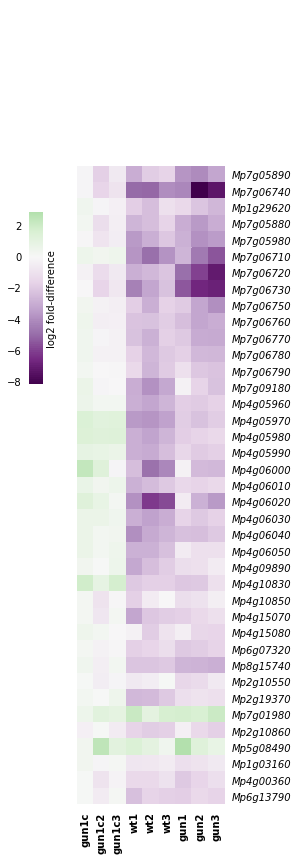

In [39]:
#create figure 7a
clustergrid = sns.clustermap(figure,col_cluster=False, row_cluster=False, method='average',center=0,cmap='PRGn',figsize=(4,12),cbar_pos=(0,0.55,0.05,0.2))
clustergrid.ax_heatmap.tick_params(right=False, bottom=False)
clustergrid.ax_heatmap.set_ylabel('')
plt.setp(clustergrid.ax_heatmap.yaxis.get_majorticklabels(), fontstyle='italic')
plt.setp(clustergrid.ax_heatmap.xaxis.get_majorticklabels(), fontweight='bold')
clustergrid.ax_cbar.tick_params(labelleft=True,labelright=False,right=False)
clustergrid.ax_cbar.set_ylabel('log2 fold-difference')
